In [120]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/Palatino LT Bold.ttf',
 '/usr/share/fonts/Palatino LT Roman.ttf',
 '/usr/share/fonts/truetype/Palatino LT Black Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Medium.ttf',
 '/usr/share/fonts/Palatino LT Black.ttf',
 '/usr/share/fonts/Palatino LT Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Light.ttf',
 '/usr/share/fonts/Palatino LT Light.ttf',
 '/usr/share/fonts/Palatino LT Black Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Italic.ttf',
 '/usr/share/fonts/Palatino LT Medium.ttf',
 '/usr/share/fonts/truetype/Palatino LT Bold.ttf',
 '/usr/share/fonts/truetype/Palatino LT Black.ttf',
 '/usr/share/fonts/Palatino LT Medium Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/Palatino LT Bold Italic.ttf',
 '/usr/share/fonts/truetype/Palatino LT Roman.ttf',
 '/usr/share/fonts/truetype/Palatino LT Medium Italic

In [122]:
from solvers import util
import matplotlib.font_manager

In [ ]:
# flist = matplotlib.font_manager.get_fontconfig_fonts()
# names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# names

#### We start by analyzing the comparison of computation times between DP-ILQR, regular consensus ADMM, and potential ADMM:

In [421]:
times_comparison= pd.read_excel('logs/ICRA2024_Monte_Carlo.xlsm', sheet_name='Sheet1')

In [422]:
times_comparison.columns

Index(['trial', 'dynamics', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std'],
      dtype='object')

In [423]:
# times_comparison = times_comparison.loc[times_comparison['converged']==True]

In [424]:
times_comparison = times_comparison.dropna()

In [425]:
times_comparison['SOVA_admm'].unique()

array(['DP-ILQR', 'Centralized MPC', False, True], dtype=object)

In [426]:
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager
font_family = 'Palatino LT'

In [427]:
quadrotor_times = times_comparison.loc[times_comparison['dynamics']=='quadrotor']
double_int_times = times_comparison.loc[times_comparison['dynamics']=='double_int']
unicycle_times= times_comparison.loc[times_comparison['dynamics']=='unicycle']

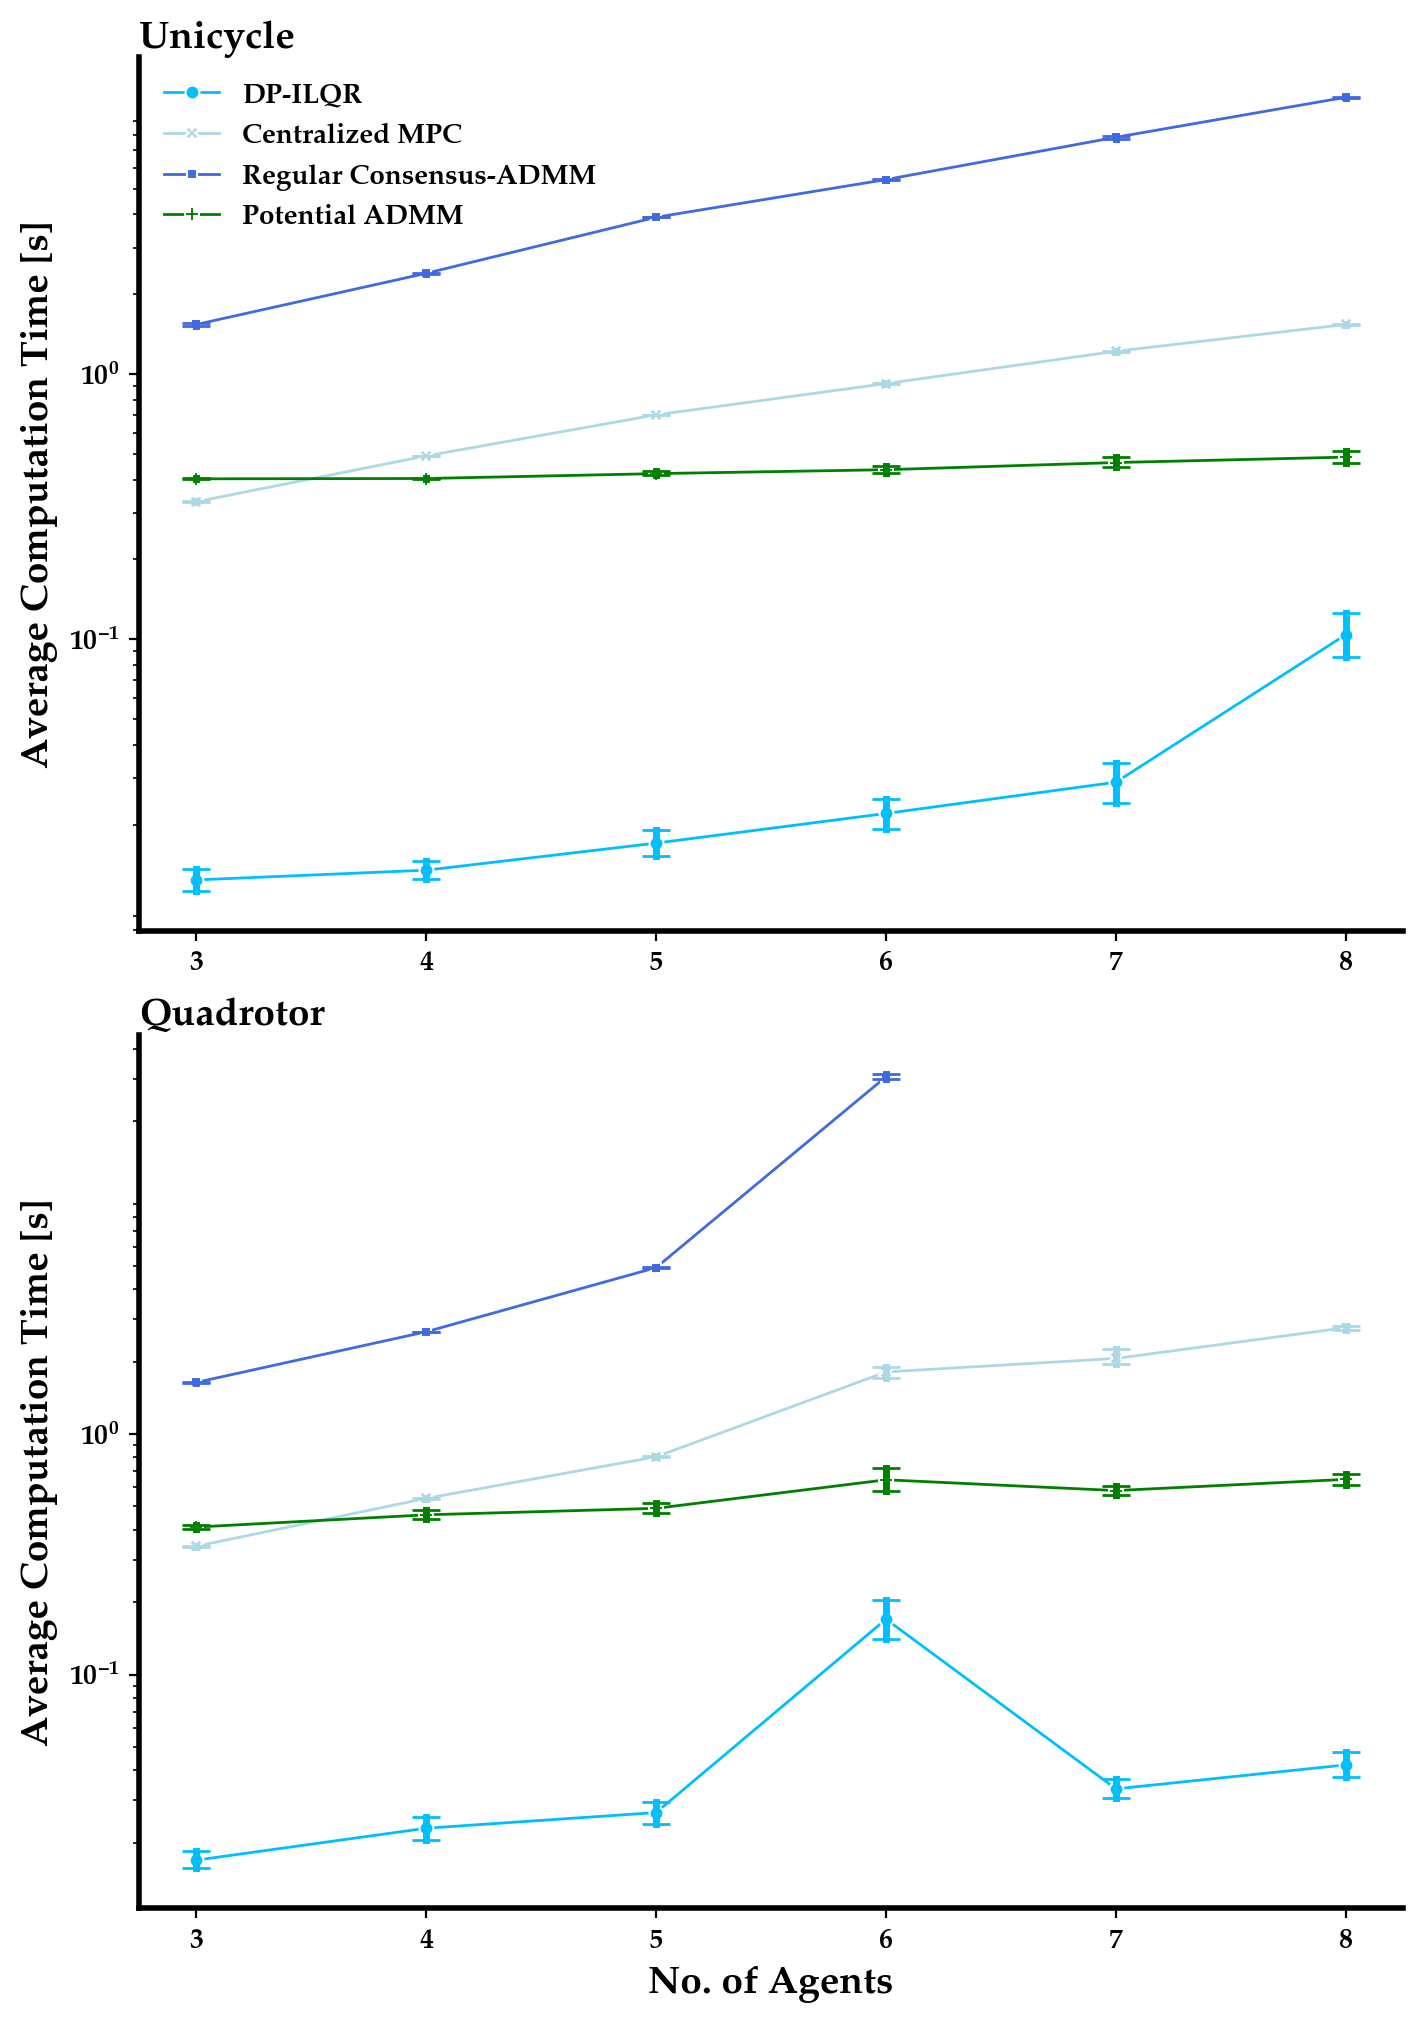

In [446]:
fig, axes = plt.subplots(2, 1, figsize=(7, 10), dpi=200)
err_kws = {'capsize': 5, 'capthick': 1, 'elinewidth': 2.5}
custom_palette = ["deepskyblue", "lightblue", "royalblue", "green"]
# # Plot data for Double Integrator
# sns.lineplot(data=double_int_times, x="n_agents", y="t_solve_avg", hue='SOVA_admm', lw=1, style='SOVA_admm',
#              dashes=False, markers=True, markersize=4.5, palette=["green", "firebrick", "grey", "blue"],
#              err_style='bars', err_kws=err_kws, ax=axes[0])
# axes[0].set_title('Double Integrator', fontname=font_family, fontsize=12, weight='bold')
# axes[0].set_yscale('log')  # Set y-axis to logarithmic scale
# axes[0].set_yticks([0.1, 1, 10])  # Set specific y-tick locations
# axes[0].set_xlabel('') 
# Plot data for Unicycle
sns.lineplot(data=unicycle_times, x="n_agents", y="t_solve_avg", hue='SOVA_admm', lw=1, style='SOVA_admm',
             dashes=False, markers=True, markersize=5, palette=custom_palette,
             err_style='bars', err_kws=err_kws, ax=axes[0])
axes[0].set_title('Unicycle', fontname=font_family, fontsize=14, weight='bold',loc='left', pad=-15)
axes[0].set_yscale('log')  # Set y-axis to logarithmic scale
axes[0].set_yticks([0.1, 1])  # Set specific y-tick locations
axes[0].set_xlabel('') 
# Plot data for Quadrotor
sns.lineplot(data=quadrotor_times, x="n_agents", y="t_solve_avg", hue='SOVA_admm', lw=1, style='SOVA_admm',
             dashes=False, markers=True, markersize=5, palette=custom_palette,
             err_style='bars', err_kws=err_kws, ax=axes[1])
axes[1].set_title('Quadrotor', fontname=font_family, fontsize=14, weight='bold',loc='left', pad=-15)
axes[1].set_yscale('log')  # Set y-axis to logarithmic scale
axes[1].set_yticks([0.1, 1])  # Set specific y-tick locations
axes[1].set_xticks([3, 4, 5, 6, 7, 8]) 
# Customize plot appearance
# Customize plot appearance
font = FontProperties(family=font_family, weight='bold')
for ax in axes:
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2.0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_ylabel('Average Computation Time [s]', fontname=font_family, fontsize=14, weight='bold')
    ax.legend().set_visible(False)  # Remove legend for all sub-figures
for ax in axes.flatten():
    ax.yaxis.get_offset_text().set_font_properties(font)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname(font_family) for label in labels]
    [label.set_fontweight('bold') for label in labels]
    
# Add legend only to the first sub-figure
axes[0].legend(labels=['DP-ILQR', 'Centralized MPC', 'Regular Consensus-ADMM', 'Potential ADMM'], frameon=False,
               prop={'family': font_family, 'weight': 'bold', 'size': 10})
font = FontProperties(family=font_family, weight='bold')
axes[-1].yaxis.get_offset_text().set_font_properties(font)
axes[-1].set_xlabel('No. of Agents', fontname=font_family, fontsize=14, weight='bold')

# Save the figure
plt.savefig('results/avg_computation_times_comparison.png', bbox_inches='tight', dpi=300, facecolor=axes[0].get_facecolor())

#### Optimality gaps of DP-ILQR, regular ADMM, and potential ADMM

In [547]:
optimality_df= pd.read_excel('logs/ICRA2024_Monte_Carlo.xlsm', sheet_name='Sheet1')

In [548]:
optimality_df.columns

Index(['trial', 'dynamics', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt',
       'radius', 'SOVA_admm', 't_solve_avg', 't_solve_std'],
      dtype='object')

In [549]:
optimality_df['dynamics'].unique()
              

array(['double_int', 'unicycle', 'quadrotor'], dtype=object)

In [550]:
quadrotor_df = optimality_df.loc[optimality_df['dynamics']=='quadrotor']
unicycle_df = optimality_df.loc[optimality_df['dynamics']=='unicycle']
double_int_df = optimality_df.loc[optimality_df['dynamics']=='double_int']

In [551]:
quadrotor['SOVA_admm'].unique()

array(['DP-ILQR', 'Centralized MPC', False, True], dtype=object)

In [552]:
n_agents = 3
quadrotor_3_ilqr = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


quadrotor_3_consensus = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
quadrotor_3_Potential = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [553]:
n_agents = 4
quadrotor_4_ilqr = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


quadrotor_4_consensus = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
quadrotor_4_Potential = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [554]:
n_agents = 5
quadrotor_5_ilqr = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


quadrotor_5_consensus = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
quadrotor_5_Potential = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [555]:
n_agents = 6
quadrotor_6_ilqr = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


quadrotor_6_consensus = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
quadrotor_6_Potential = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [556]:
n_agents = 7
quadrotor_7_ilqr = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


# quadrotor_7_consensus = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == False)]['obj_trj'].values - \
#                         quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
#                 quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
quadrotor_7_Potential = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [557]:
n_agents = 8
quadrotor_8_ilqr = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
    
quadrotor_8_Potential = (quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                quadrotor_df[(quadrotor_df['n_agents'] == n_agents) & (quadrotor_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [558]:
n_agents = 3
unicycle_3_ilqr = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


unicycle_3_consensus = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
unicycle_3_Potential = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [559]:
n_agents = 4
unicycle_4_ilqr = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


unicycle_4_consensus = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
unicycle_4_Potential = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [560]:
n_agents = 5
unicycle_5_ilqr = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


unicycle_5_consensus = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
unicycle_5_Potential = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [561]:
n_agents = 6
unicycle_6_ilqr = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


unicycle_6_consensus = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
unicycle_6_Potential = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [562]:
n_agents = 7
unicycle_7_ilqr = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


unicycle_7_consensus = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
unicycle_7_Potential = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [563]:
n_agents = 8
unicycle_8_ilqr = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'DP-ILQR')]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values


unicycle_8_consensus = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == False)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
 
    
unicycle_8_Potential = (unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == True)]['obj_trj'].values - \
                        unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values)/ \
                unicycle_df[(unicycle_df['n_agents'] == n_agents) & (unicycle_df['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
            

In [564]:
quadrotor_optimality_data = np.hstack((quadrotor_3_ilqr,quadrotor_3_consensus,quadrotor_3_Potential,
                                       quadrotor_4_ilqr,quadrotor_4_consensus,quadrotor_4_Potential,
                                       quadrotor_5_ilqr,quadrotor_5_consensus,quadrotor_5_Potential,
                                       quadrotor_6_ilqr,quadrotor_6_consensus,quadrotor_6_Potential,
                                       quadrotor_7_ilqr,quadrotor_7_Potential,
                                       quadrotor_8_ilqr,quadrotor_8_Potential))
quadrotor_n_agents = np.hstack(([3]*quadrotor_3_ilqr.size,[3]*quadrotor_3_consensus.size,[3]*quadrotor_3_Potential.size,
                                [4]*quadrotor_4_ilqr.size,[4]*quadrotor_4_consensus.size,[4]*quadrotor_4_Potential.size,
                                [5]*quadrotor_5_ilqr.size,[5]*quadrotor_5_consensus.size,[5]*quadrotor_5_Potential.size,
                                [6]*quadrotor_6_ilqr.size,[6]*quadrotor_6_consensus.size,[6]*quadrotor_6_Potential.size,
                                [7]*quadrotor_7_ilqr.size,[7]*quadrotor_7_Potential.size,
                                [8]*quadrotor_8_ilqr.size,[8]*quadrotor_8_Potential.size))

method = np.hstack((['DP-ILQR']*quadrotor_3_ilqr.size,['Regular Consensus']*quadrotor_3_consensus.size,['Potential ADMM']*quadrotor_3_Potential.size,
                    ['DP-ILQR']*quadrotor_4_ilqr.size,['Regular Consensus']*quadrotor_4_consensus.size,['Potential ADMM']*quadrotor_4_Potential.size,
                    ['DP-ILQR']*quadrotor_5_ilqr.size,['Regular Consensus']*quadrotor_5_consensus.size,['Potential ADMM']*quadrotor_5_Potential.size,
                    ['DP-ILQR']*quadrotor_6_ilqr.size,['Regular Consensus']*quadrotor_6_consensus.size,['Potential ADMM']*quadrotor_6_Potential.size,
                    ['DP-ILQR']*quadrotor_7_ilqr.size,['Potential ADMM']*quadrotor_7_Potential.size,
                    ['DP-ILQR']*quadrotor_8_ilqr.size,['Potential ADMM']*quadrotor_8_Potential.size))
                    
                                

In [565]:
df_quadrotor = pd.DataFrame({'No. of Agents':quadrotor_n_agents,
                             'Relative Optimality Gap':quadrotor_optimality_data,
                             'Algorithm':method})

In [583]:
df_quadrotor = df_quadrotor.loc[df_quadrotor['Relative Optimality Gap'] >=1e-3]
df_quadrotor['Relative Optimality Gap'] = df_quadrotor['Relative Optimality Gap'] * 100

In [584]:
unicycle_optimality_data = np.hstack((unicycle_3_ilqr,unicycle_3_consensus,unicycle_3_Potential,
                                       unicycle_4_ilqr,unicycle_4_consensus,unicycle_4_Potential,
                                       unicycle_5_ilqr,unicycle_5_consensus,unicycle_5_Potential,
                                       unicycle_6_ilqr,unicycle_6_consensus,unicycle_6_Potential,
                                       unicycle_7_ilqr,unicycle_7_consensus,unicycle_7_Potential,
                                       unicycle_8_ilqr,unicycle_8_consensus,unicycle_8_Potential))
unicycle_n_agents = np.hstack(([3]*unicycle_3_ilqr.size,[3]*unicycle_3_consensus.size,[3]*unicycle_3_Potential.size,
                                [4]*unicycle_4_ilqr.size,[4]*unicycle_4_consensus.size,[4]*unicycle_4_Potential.size,
                                [5]*unicycle_5_ilqr.size,[5]*unicycle_5_consensus.size,[5]*unicycle_5_Potential.size,
                                [6]*unicycle_6_ilqr.size,[6]*unicycle_6_consensus.size,[6]*unicycle_6_Potential.size,
                                [7]*unicycle_7_ilqr.size,[7]*unicycle_7_consensus.size,[7]*unicycle_7_Potential.size,
                                [8]*unicycle_8_ilqr.size,[8]*unicycle_8_consensus.size, [8]*unicycle_8_Potential.size))

method = np.hstack((['DP-ILQR']*unicycle_3_ilqr.size,['Regular Consensus']*unicycle_3_consensus.size,['Potential ADMM']*unicycle_3_Potential.size,
                    ['DP-ILQR']*unicycle_4_ilqr.size,['Regular Consensus']*unicycle_4_consensus.size,['Potential ADMM']*unicycle_4_Potential.size,
                    ['DP-ILQR']*unicycle_5_ilqr.size,['Regular Consensus']*unicycle_5_consensus.size,['Potential ADMM']*unicycle_5_Potential.size,
                    ['DP-ILQR']*unicycle_6_ilqr.size,['Regular Consensus']*unicycle_6_consensus.size,['Potential ADMM']*unicycle_6_Potential.size,
                    ['DP-ILQR']*unicycle_7_ilqr.size,['Regular Consensus']*unicycle_7_consensus.size,['Potential ADMM']*unicycle_7_Potential.size,
                    ['DP-ILQR']*unicycle_8_ilqr.size,['Regular Consensus']*unicycle_8_consensus.size,['Potential ADMM']*unicycle_8_Potential.size))
                    

In [585]:
df_unicycle = pd.DataFrame({'No. of Agents':unicycle_n_agents,
                             'Relative Optimality Gap':unicycle_optimality_data,
                             'Algorithm':method})

In [586]:
df_unicycle= df_unicycle.loc[df_unicycle['Relative Optimality Gap'] >=1e-3]
df_unicycle['Relative Optimality Gap'] = df_unicycle['Relative Optimality Gap'] * 100

In [599]:
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

<Figure size 960x720 with 0 Axes>

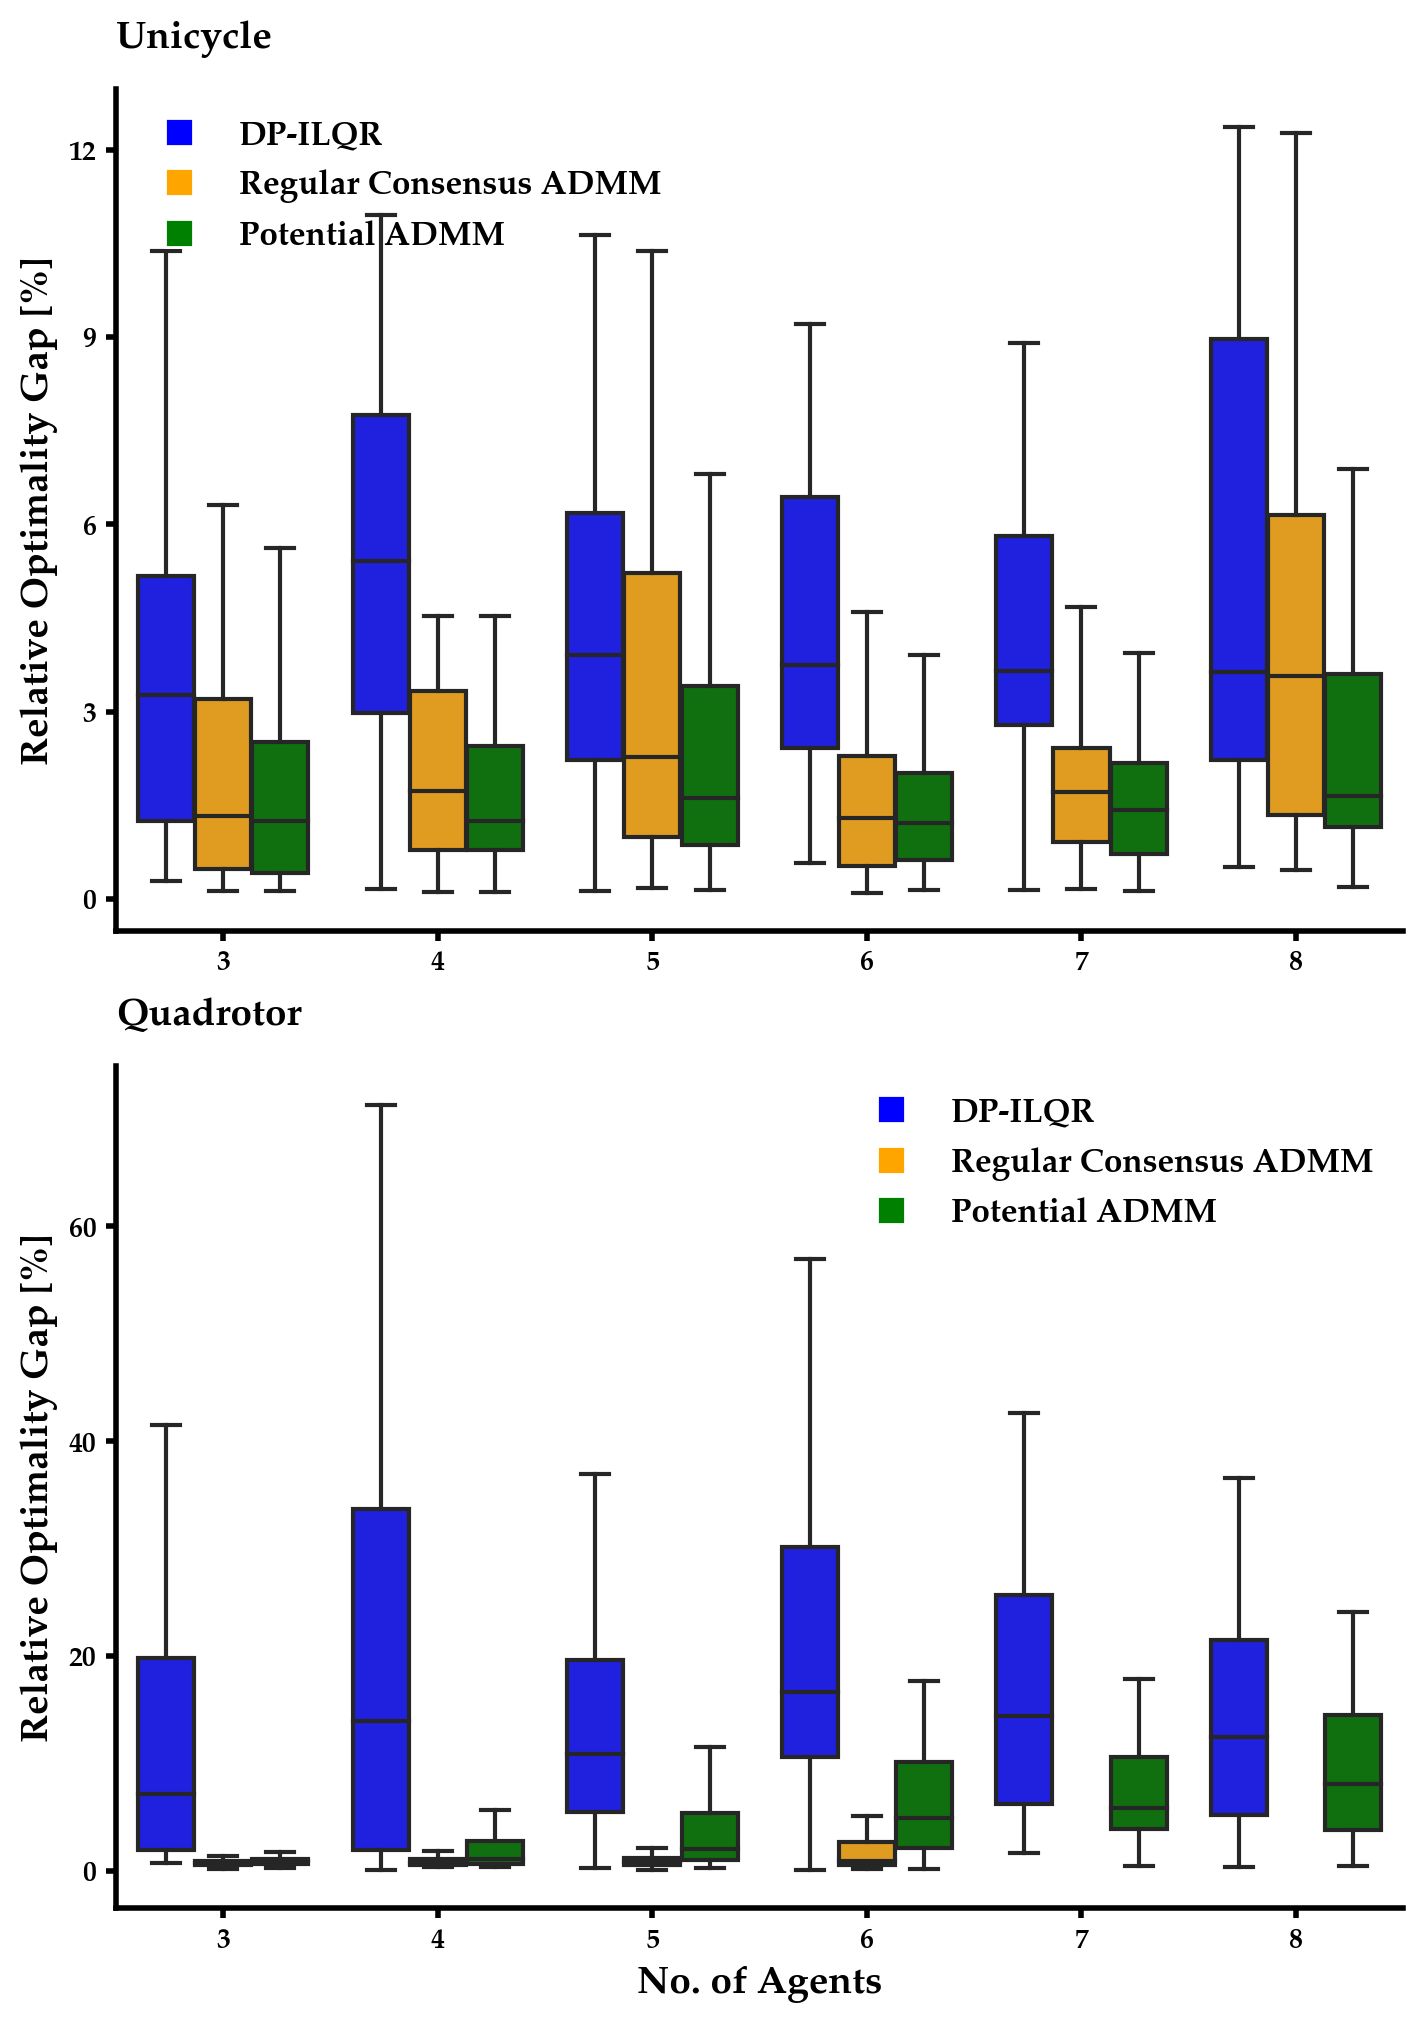

In [604]:
### Plotting optimality gaps for Unicycle and Quadrotor
# Create a color palette for the two methods
colors = ['blue', 'orange','green']

plt.figure(dpi=150)
fig, axes = plt.subplots(2, 1, figsize=(7, 10), dpi=200)

# Explicitly set colors for each method for Unicycle
sns.boxplot(x='No. of Agents', y='Relative Optimality Gap', data=df_unicycle, ax=axes[0], hue='Algorithm',
            palette=colors, showfliers=False)
sns.despine(right=True)
axes[0].set_xlabel('') 
axes[0].set_title('Unicycle', fontname=font_family, fontsize=14, weight='bold', loc='left', pad=15)
axes[0].set_ylabel('Relative Optimality Gap [%]',fontname=font_family,fontsize=14,weight='bold')
# Explicitly set colors for each method for Quadrotor
sns.boxplot(x='No. of Agents', y='Relative Optimality Gap', data=df_quadrotor, ax=axes[1], hue='Algorithm',
            palette=colors, showfliers=False)
sns.despine(right=True)
axes[1].set_xlabel('No. of Agents',fontname=font_family,fontsize=14,weight='bold') 
axes[1].set_ylabel('Relative Optimality Gap [%]',fontname=font_family,fontsize=14,weight='bold') 
axes[1].set_title('Quadrotor', fontname=font_family, fontsize=14, weight='bold', loc='left', pad=15)

for i in range(2):
    labels = axes[i].get_yticklabels()
    [label.set_fontname(font_family) for label in labels]
    [label.set_weight('bold') for label in labels]
    
    # Customize x-axis tick labels
    labels_x = axes[i].get_xticklabels()
    [label.set_fontname(font_family) for label in labels_x]
    [label.set_weight('bold') for label in labels_x]

    # Switch y-axis to log scale
    # axes[i].set_yscale('log')

# Increase linewidth of bottom and left spines for both subplots
for axis in ['bottom', 'left']:
    axes[0].spines[axis].set_linewidth(2.0)
    axes[1].spines[axis].set_linewidth(2.0)

# Hide top and right spines for both subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Customize tick labels
    

# Increase tick width for both subplots
for ax in axes:
    ax.tick_params(width=2.0)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Create a custom legend with boxes for both subplots
legend_label = ['DP-ILQR', 'Regular Consensus ADMM', 'Potential ADMM']

handles = [plt.Line2D([0], [0], marker='s', color='w', label=label, markerfacecolor=color, markersize=10)
            for label, color in zip(legend_labels1, colors)]
axes[0].legend(loc='upper left', handles=handles, frameon=False, prop={'family': font_family, 'weight': 'bold', 'size': 12})
axes[1].legend(loc='upper right', handles=handles, frameon=False, prop={'family': font_family, 'weight': 'bold', 'size': 12})

# Show the plot (optional)
# plt.show()
plt.savefig('results/optimality_gaps.png', bbox_inches='tight', dpi=300, facecolor=axes[0].get_facecolor())

In [536]:
# # Define the range of agent numbers
# agent_numbers = [3, 4, 5, 6, 7, 8]  # Add more agent numbers as needed

# # Define the dynamics models
# dynamics_models = ['double_int','unicycle','quadrotor']

# # Create a dictionary to store the results
# results = {}

# # Loop through dynamics models
# for dynamics_model in dynamics_models:
#     dynamics_results = {}  # Dictionary to store results for the current dynamics model
#     df_curr = optimality_df.loc[optimality_df['dynamics']==dynamics_model]
#     # Loop through agent numbers
#     for n_agents in agent_numbers:
        
#         sova_admm_values = [True, 'DP-ILQR', False]
#         if (n_agents > 6) and (dynamics_model == 'quadrotor'):
#             sova_admm_values = [True, 'DP-ILQR']  
#         # Loop through SOVA_admm values
#         for sova_admm_value in sova_admm_values:
            
#             key = f'{dynamics_model}_{n_agents}_{sova_admm_value}'.replace(" ", "_").lower()
#             numerator = df_curr[(df_curr['n_agents'] == n_agents) & (df_curr['SOVA_admm'] == sova_admm_value)]['obj_trj'].values - \
#                         df_curr[(df_curr['n_agents'] == n_agents) & (df_curr['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
#             denominator = df_curr[(df_curr['n_agents'] == n_agents) & (df_curr['SOVA_admm'] == 'Centralized MPC')]['obj_trj'].values
#             result = numerator / denominator * 100
#             dynamics_results[key] = result
#     # Store the results for the current dynamics model in the main results dictionary
#     results[dynamics_model] = dynamics_results


# # Now, the results dictionary contains variables for different combinations of agent numbers, SOVA_admm values, and dynamics models
# # You can access them like this:
# # for dynamics_model, dynamics_results in results.items():
# #     for key, value in dynamics_results.items():
# #         print(f'{dynamics_model}: {key}, {value}')

In [220]:
### Plotting the optimality gaps


<Figure size 960x720 with 0 Axes>

findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Font family 'Palatino LT' not found.
findfont: Fon

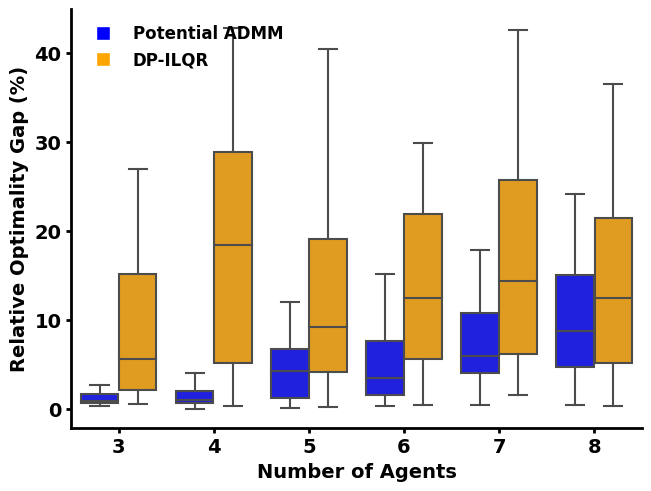

In [732]:
# Create a color palette for the two methods
colors = ['blue', 'orange']

plt.figure(dpi=150)
fig, ax = plt.subplots()

# Explicitly set colors for each method
sns.boxplot(x='n_agents', y='relative_gap_admm', data=optimality_combined_df, ax=ax, hue='method',
            palette=colors, showfliers=False)
sns.despine(right=True)

# Increase linewidth of bottom and left spines
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick width
ax.tick_params(width=2.0)

# Increase label and tick font sizes
plt.xticks(fontname=font_family, size=14, weight='bold')
plt.yticks(fontname=font_family, size=14, weight='bold')

plt.ylabel('Relative Optimality Gap (%)', fontname=font_family, fontsize=14, weight='bold')
plt.xlabel('Number of Agents', fontname=font_family, fontsize=14, weight='bold')

ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Create a custom legend with boxes
legend_labels = ['Potential ADMM', 'DP-ILQR']
handles = [plt.Line2D([0], [0], marker='s', color='w', label=label, markerfacecolor=color, markersize=10)
           for label, color in zip(legend_labels, colors)]
plt.legend(loc='upper left',handles=handles, frameon=False, prop={'family': font_family, 'weight': 'bold', 'size': 12})

# Show the plot (optional)
plt.show()

In [733]:
optimality_stats = optimality_combined_df.groupby(['n_agents','method']).agg({'relative_gap_admm':['mean','std']})
optimality_stats.columns = ['mean %','std %']
optimality_stats = optimality_stats.reset_index()
optimality_stats

,n_agents,method,mean %,std %
0,3,SOVA,2.200801,3.973997
1,3,ilqr,13.131487,17.202176
2,4,SOVA,1.779774,1.762729
3,4,ilqr,19.821043,19.187270
4,5,SOVA,5.037403,4.946410
5,5,ilqr,15.124626,17.128788
6,6,SOVA,6.354908,7.515514
7,6,ilqr,28.671215,80.376557
8,7,SOVA,8.108640,6.860123
9,7,ilqr,23.753049,36.171639
